In [44]:
#import necessary libraries
import pandas as pd
import numpy as np
import datetime
import datetime as dt
import seaborn as sea
import matplotlib.pyplot as plot
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import ast
from geopy.distance import great_circle
rcParams['figure.figsize'] = 20,6

#Data Preparation

In [2]:
#read the dataframe
cab_data = pd.read_csv("D:/prac/cabData.csv")
cab_data.head(10)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
5,1372636965620000231,C,NaN,NaN,20000231,1372636965,A,False,"[[-8.615502,41.140674],[-8.614854,41.140926],[..."
6,1372637210620000456,C,NaN,NaN,20000456,1372637210,A,False,"[[-8.57952,41.145948],[-8.580942,41.145039],[-..."
7,1372637299620000011,C,NaN,NaN,20000011,1372637299,A,False,"[[-8.617563,41.146182],[-8.617527,41.145849],[..."
8,1372637274620000403,C,NaN,NaN,20000403,1372637274,A,False,"[[-8.611794,41.140557],[-8.611785,41.140575],[..."
9,1372637905620000320,C,NaN,NaN,20000320,1372637905,A,False,"[[-8.615907,41.140557],[-8.614449,41.141088],[..."


In [45]:
#explore the dataset
cab_data.shape

(1710670, 9)

In [46]:
#make a copy of dataset
cab_data_dummies=cab_data.copy()

# DATA PREPERATION and EDA

In [47]:
#converting the time stamp from linux to datetime
cab_data_dummies['TIMESTAMP']=pd.to_datetime(cab_data_dummies['TIMESTAMP'], unit='s')

In [48]:
#extracting date and time and day from the timestamp
cab_data_dummies['DATE'] = cab_data_dummies['TIMESTAMP'].dt.date
cab_data_dummies['Trip_start_time'] = cab_data_dummies['TIMESTAMP'].dt.time
cab_data_dummies['Trip_start_hour'] = cab_data_dummies['TIMESTAMP'].dt.hour
cab_data_dummies['Trip_start_day'] = cab_data_dummies['TIMESTAMP'].dt.strftime("%A")
cab_data_dummies['Trip_start_year'] = cab_data_dummies['TIMESTAMP'].dt.year
cab_data_dummies['Trip_start_month_num'] = cab_data_dummies['TIMESTAMP'].dt.month
cab_data_dummies['Trip_start_day_month'] = cab_data_dummies['TIMESTAMP'].dt.strftime("%B")
cab_data_dummies.head(20)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,DATE,Trip_start_time,Trip_start_hour,Trip_start_day,Trip_start_year,Trip_start_month_num,Trip_start_day_month
0,1372636858620000589,C,NaN,NaN,20000589,2013-07-01 00:00:58,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",2013-07-01,00:00:58,0,Monday,2013,7,July
1,1372637303620000596,B,NaN,7.0,20000596,2013-07-01 00:08:23,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...",2013-07-01,00:08:23,0,Monday,2013,7,July
2,1372636951620000320,C,NaN,NaN,20000320,2013-07-01 00:02:31,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...",2013-07-01,00:02:31,0,Monday,2013,7,July
3,1372636854620000520,C,NaN,NaN,20000520,2013-07-01 00:00:54,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",2013-07-01,00:00:54,0,Monday,2013,7,July
4,1372637091620000337,C,NaN,NaN,20000337,2013-07-01 00:04:51,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...",2013-07-01,00:04:51,0,Monday,2013,7,July
5,1372636965620000231,C,NaN,NaN,20000231,2013-07-01 00:02:45,A,False,"[[-8.615502,41.140674],[-8.614854,41.140926],[...",2013-07-01,00:02:45,0,Monday,2013,7,July
6,1372637210620000456,C,NaN,NaN,20000456,2013-07-01 00:06:50,A,False,"[[-8.57952,41.145948],[-8.580942,41.145039],[-...",2013-07-01,00:06:50,0,Monday,2013,7,July
7,1372637299620000011,C,NaN,NaN,20000011,2013-07-01 00:08:19,A,False,"[[-8.617563,41.146182],[-8.617527,41.145849],[...",2013-07-01,00:08:19,0,Monday,2013,7,July
8,1372637274620000403,C,NaN,NaN,20000403,2013-07-01 00:07:54,A,False,"[[-8.611794,41.140557],[-8.611785,41.140575],[...",2013-07-01,00:07:54,0,Monday,2013,7,July
9,1372637905620000320,C,NaN,NaN,20000320,2013-07-01 00:18:25,A,False,"[[-8.615907,41.140557],[-8.614449,41.141088],[...",2013-07-01,00:18:25,0,Monday,2013,7,July


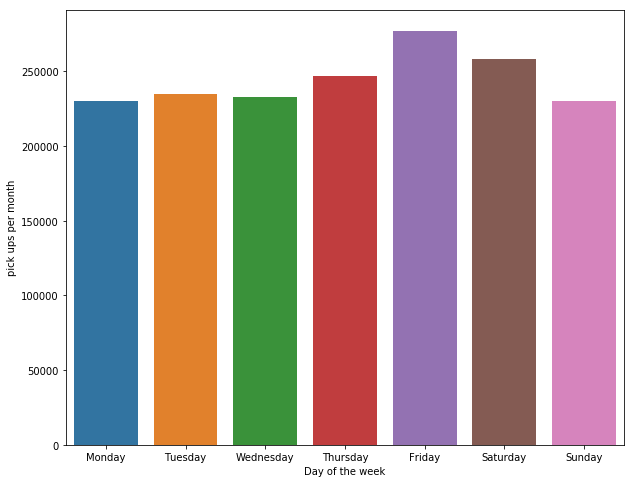

In [49]:
#plot to check number of pick ups per day of the month
plot.figure(figsize = (10,8))
sea.countplot(cab_data_dummies.Trip_start_day)
plot.xlabel('Day of the week')
plot.ylabel('pick ups per month')
plot.show()

In [203]:
#CALCULATING TIME OF TRIP FROM POLYLINE (lat long pairs)
#Polyline contains lat long pairs obatined every 15 sec during the travel.
#Length is the number of lat long pairs per travel (in a row)
#length -1 indicates len-trip starting point
cab_data_dummies['Length'] = cab_data_dummies['POLYLINE'].apply(lambda x : len(eval(x))-1)
#Trip time in sec is calculated as length of all the coordinates * 15 sec 
cab_data_dummies['Trip_Time(sec)'] = cab_data_dummies['Length'].apply(lambda x : x * 15)
#Trip time in minutes. trip time in sec/60
cab_data_dummies['Trip_Time(min)'] = cab_data_dummies['Length'].apply(lambda x : (x * 15)/60)

KeyboardInterrupt: 

In [107]:
cab_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710670 entries, 0 to 1710669
Data columns (total 18 columns):
TRIP_ID                int64
ORIGIN_CALL            float64
ORIGIN_STAND           float64
TAXI_ID                int64
TIMESTAMP              datetime64[ns]
DAY_TYPE               object
MISSING_DATA           bool
POLYLINE               object
cab_hire_by_call       uint8
cab_hire_at_stand      uint8
cab_hire_other_ways    uint8
DATE                   object
Trip_start_time        object
Trip_start_hour        int64
Trip_start_day         object
Length                 int64
Trip Time(sec)         int64
Trip Time(min)         float64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(5), object(5), uint8(3)
memory usage: 189.2+ MB


# predicting the trip duration

#EDA

Text(0.5, 1.0, 'number of trips per hour')

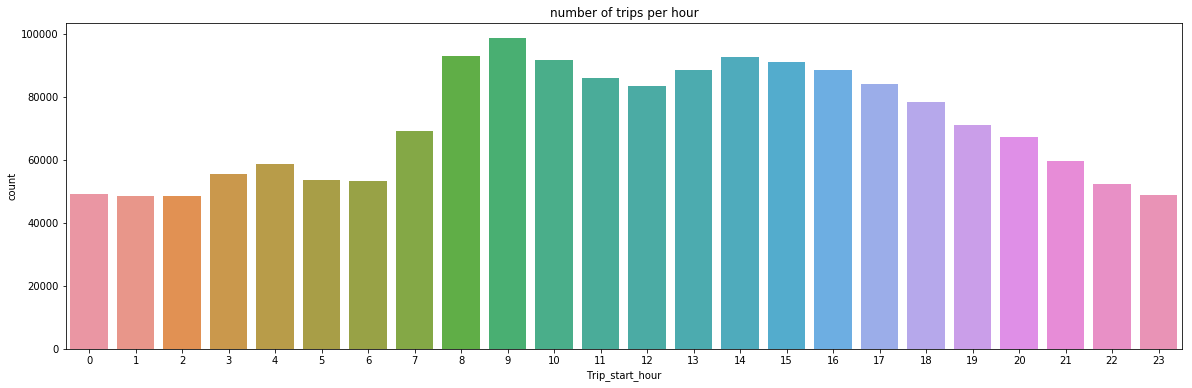

In [50]:
#plot to check the number of trips per hour
sea.countplot(cab_data_dummies.Trip_start_hour)
plot.title('number of trips per hour')

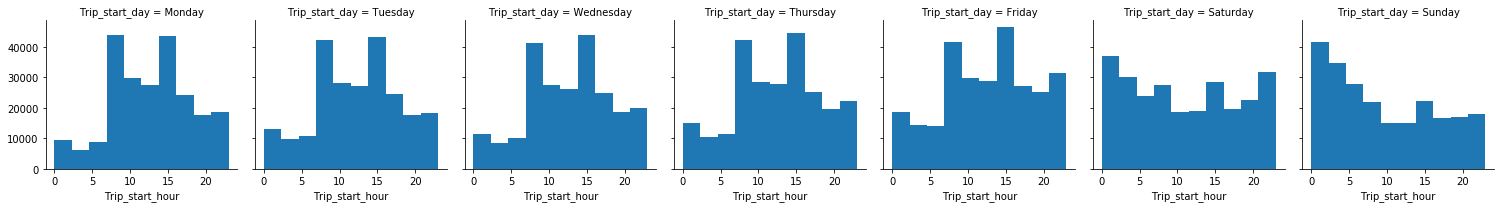

In [51]:
#plot to check number of pick ups during the hour of the day
sea.FacetGrid(cab_data_dummies, col='Trip_start_day').map(plot.hist, 'Trip_start_hour')
plot.show()

Text(0, 0.5, 'avg_duration(mins)')

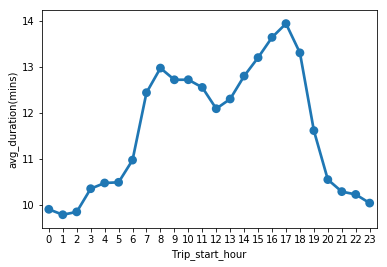

In [120]:
#Average trip duration in minutes per hour
avg_travel_time =cab_data_dummies.groupby('Trip_start_hour')['Trip Time(min)'].mean()
sea.pointplot(avg_travel_time.index, avg_travel_time.values)
plot.ylabel('avg_duration(mins)')
#below plot says that the trip duration depends on time of the day
#as we can see that the average duration is high in peak hours.
#Avg duration of the trip gradually increases from 7 am and goes high at 8 am 

# number of people who will avail cab next day from stand 
#time series

In [52]:
#group by call_type 'B' - people who will avail cab from stand and store it in a new dataframe
new=cab_data_dummies[cab_data['CALL_TYPE'] == 'B']

In [189]:
new.head(10)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,DATE,Trip_start_time,Trip_start_hour,Trip_start_day,Trip_start_year,Trip_start_month_num,Trip_start_day_month
1,1372637303620000596,B,NaN,7.0,20000596,2013-07-01 00:08:23,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...",2013-07-01,00:08:23,0,Monday,2013,7,July
15,1372637610620000497,B,NaN,13.0,20000497,2013-07-01 00:13:30,A,False,"[[-8.585145,41.164857],[-8.584146,41.164704],[...",2013-07-01,00:13:30,0,Monday,2013,7,July
16,1372638481620000403,B,NaN,28.0,20000403,2013-07-01 00:28:01,A,False,"[[-8.584263,41.163156],[-8.584695,41.163003],[...",2013-07-01,00:28:01,0,Monday,2013,7,July
23,1372639960620000309,B,NaN,38.0,20000309,2013-07-01 00:52:40,A,False,"[[-8.60418,41.160969],[-8.603874,41.1615],[-8....",2013-07-01,00:52:40,0,Monday,2013,7,July
28,1372639635620000178,B,NaN,52.0,20000178,2013-07-01 00:47:15,A,False,"[[-8.613243,41.154444],[-8.612811,41.153733],[...",2013-07-01,00:47:15,0,Monday,2013,7,July
38,1372639973620000686,B,NaN,23.0,20000686,2013-07-01 00:52:53,A,False,"[[-8.61255,41.146128],[-8.612199,41.146074],[-...",2013-07-01,00:52:53,0,Monday,2013,7,July
40,1372640356620000657,B,NaN,22.0,20000657,2013-07-01 00:59:16,A,False,"[[-8.689329,41.168115],[-8.689221,41.167647],[...",2013-07-01,00:59:16,0,Monday,2013,7,July
48,1372641991620000231,B,NaN,13.0,20000231,2013-07-01 01:26:31,A,False,"[[-8.628363,41.157486],[-8.626707,41.157621],[...",2013-07-01,01:26:31,1,Monday,2013,7,July
50,1372641742620000657,B,NaN,22.0,20000657,2013-07-01 01:22:22,A,False,"[[-8.689338,41.168124],[-8.68887,41.167359],[-...",2013-07-01,01:22:22,1,Monday,2013,7,July
52,1372641197620000653,B,NaN,13.0,20000653,2013-07-01 01:13:17,A,False,"[[-8.628354,41.157459],[-8.628237,41.157585],[...",2013-07-01,01:13:17,1,Monday,2013,7,July


In [53]:
new.shape

(817881, 16)

In [54]:
#count the dates and store the values in a new dataframe
new_series=new.DATE.value_counts()
#edit the columns in the new dataset and sort the dataset
new_series = new_series.reset_index()
new_series.columns = ['DATE', 'counts']
new_series.sort_values('DATE',ascending=True,inplace=True)
new_series.tail(10)

,DATE,counts
115,2014-06-21,2385
288,2014-06-22,1993
54,2014-06-23,2559
242,2014-06-24,2102
83,2014-06-25,2465
41,2014-06-26,2612
15,2014-06-27,2766
125,2014-06-28,2362
345,2014-06-29,1750
77,2014-06-30,2477


In [55]:
#the new series has 365 rows (1 year data)
new_series.shape

(365, 2)

In [56]:
#change the datatype of the date column
new_series['DATE'] =  pd.to_datetime(new_series['DATE'], format='%Y-%m-%d')

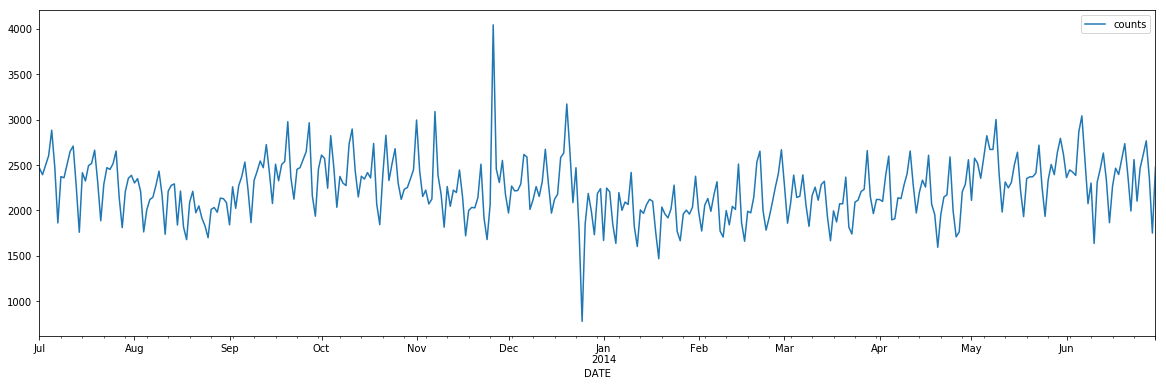

In [57]:
#time series plot
new_series.plot(x='DATE', y='counts')

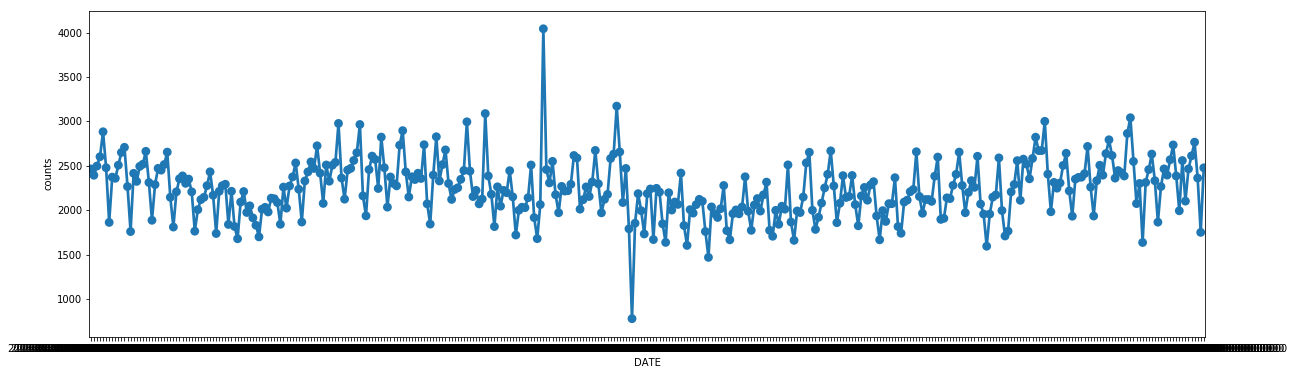

In [58]:
#point plot to detect outliers
sea.pointplot(x = "DATE", y = "counts", data = new_series)

In [59]:
#from the above plot it is clear that there are outliers in the data
#the outliers could be because of some special days like festivals and holidays.
#dropping the above rows for consistency in the data
new_series=new_series[new_series['counts'] < 4000]
new_series=new_series[new_series['counts'] > 1000]

In [60]:
new_series.shape

(363, 2)

In [61]:
#test for stationarity
#dickey-fuller test
df_test=adfuller(new_series['counts'], autolag='AIC')
print(df_test)
#p-value=0.09 the data is stationary

(-2.6081852587061887, 0.09131731421399963, 14, 348, {'1%': -3.4492815848836296, '5%': -2.8698813715275406, '10%': -2.5712138845950587}, 4653.613655284493)


In [ ]:
#ARIMA for forecasting

In [62]:
#set index on date column for further processing
new_series_set=new_series.set_index(['DATE'])

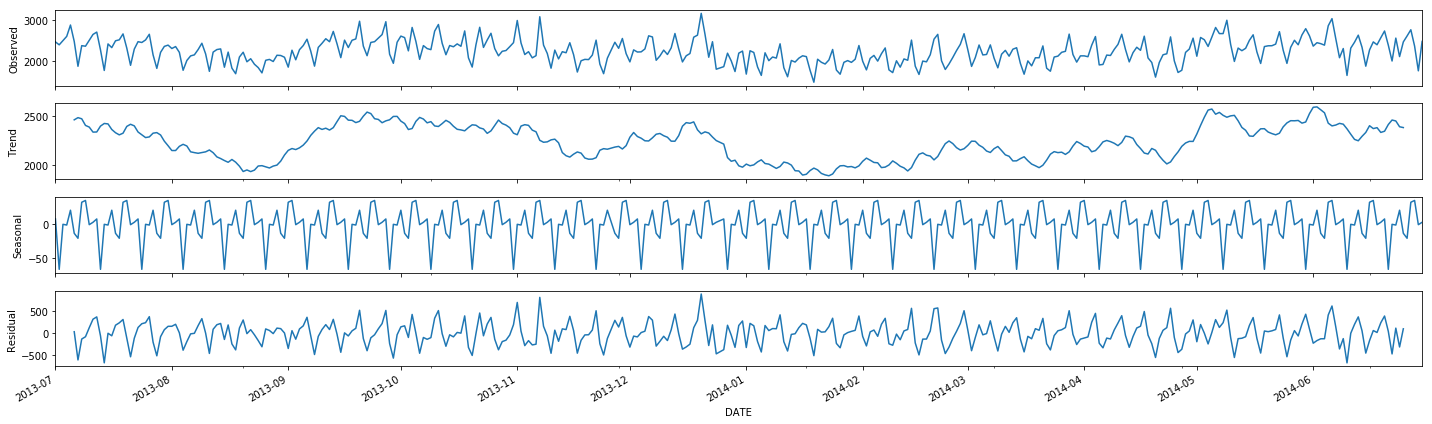

In [63]:
#using the seasonal-decompose function to plot trend, seasonality and cylicality from the time series data
decompose = seasonal_decompose(new_series_set, freq=11,model='additive')
decompose.plot()
plot.show()

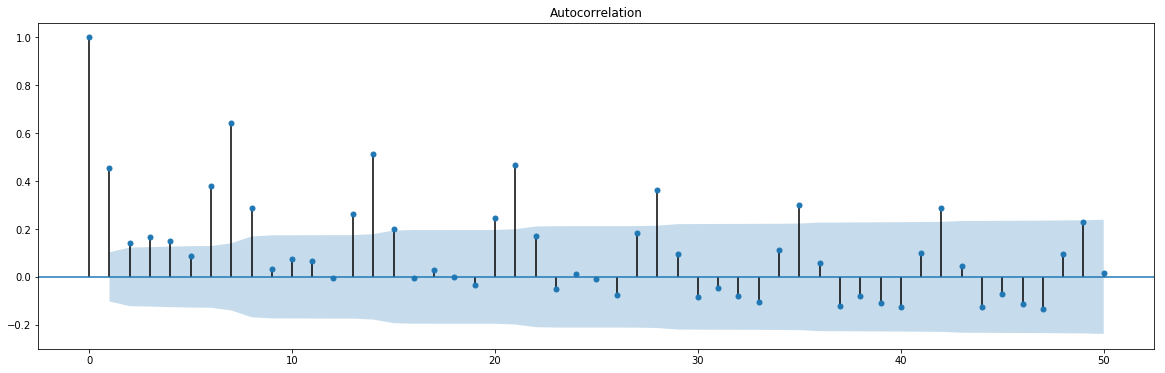

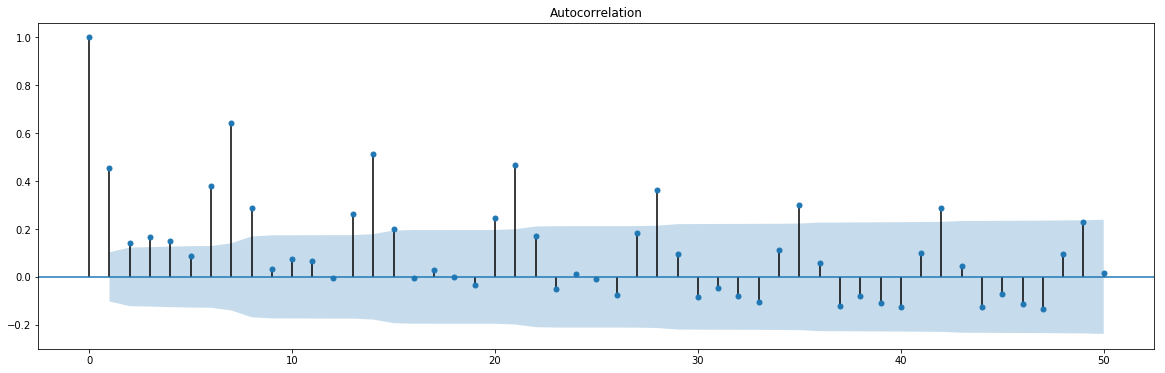

In [64]:
#ACF plot to determine the value of p
plot_acf(new_series_set,lags=50)

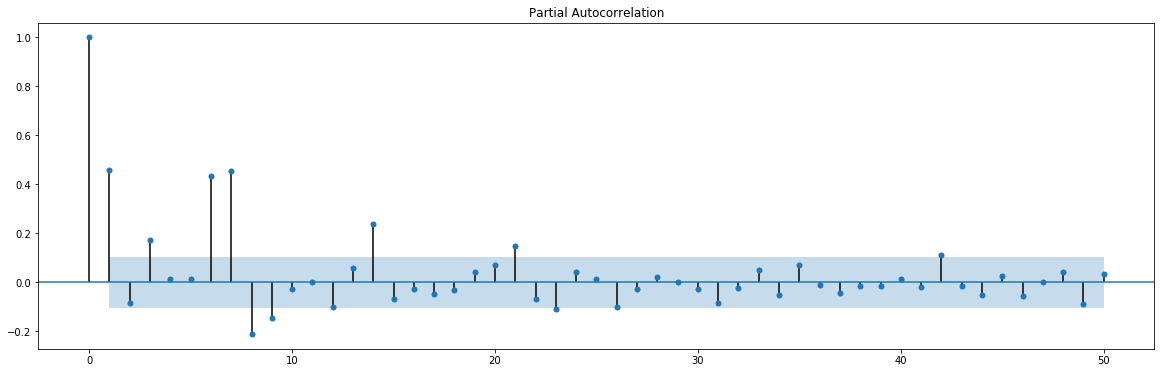

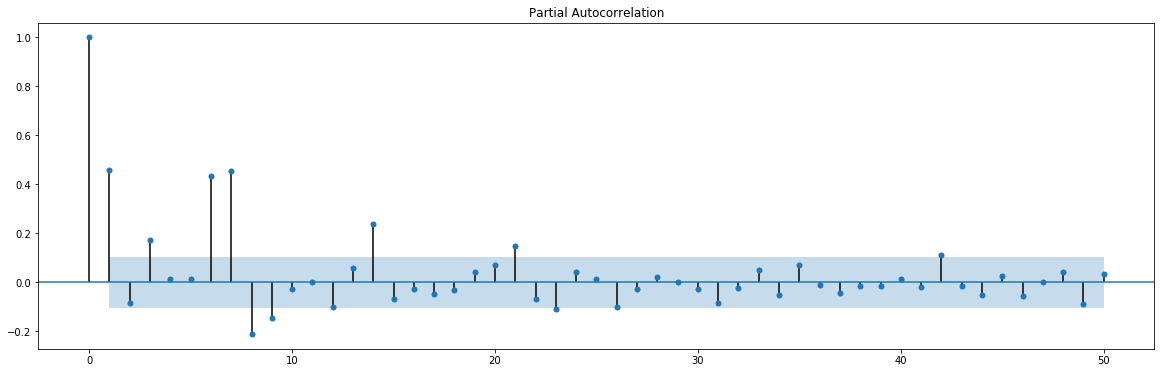

In [65]:
#pacf plot to determine the value of q
plot_pacf(new_series_set, lags=50)

In [ ]:
#ARIMA model

In [66]:
#fitting the ARIMA model
model= ARIMA(new_series_set,order=(2,0,2))
result = model.fit(disp=0)

C:\Users\kavya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


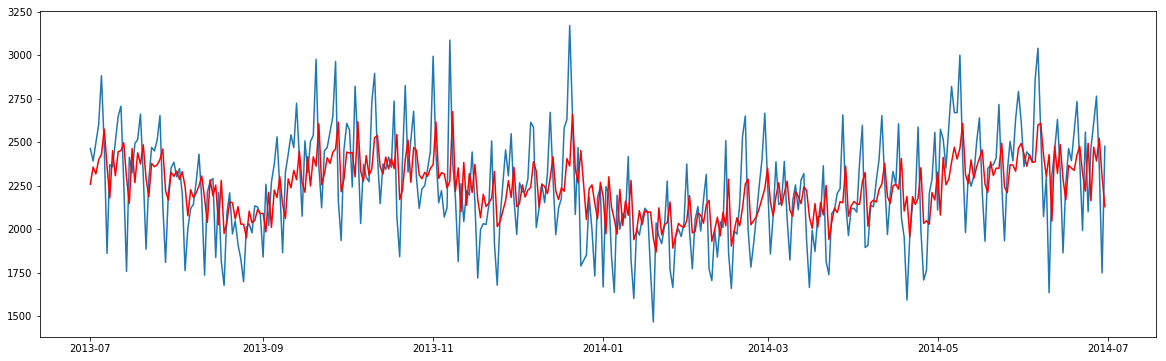

In [67]:
#plot of actual vs fitted model
a=plot.plot(new_series_set)
b=plot.plot(result.fittedvalues,color='red')

In [68]:
#Printing the predicted values
predictions_ARIMA=pd.Series(result.fittedvalues,copy=True)
print(predictions_ARIMA.head(10))

DATE
2013-07-01    2259.977620
2013-07-02    2357.658132
2013-07-03    2319.226558
2013-07-04    2399.996487
2013-07-05    2431.451843
2013-07-06    2576.644433
2013-07-07    2362.084519
2013-07-08    2181.619971
2013-07-09    2452.525891
2013-07-10    2308.158492
dtype: float64


C:\Users\kavya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\kavya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


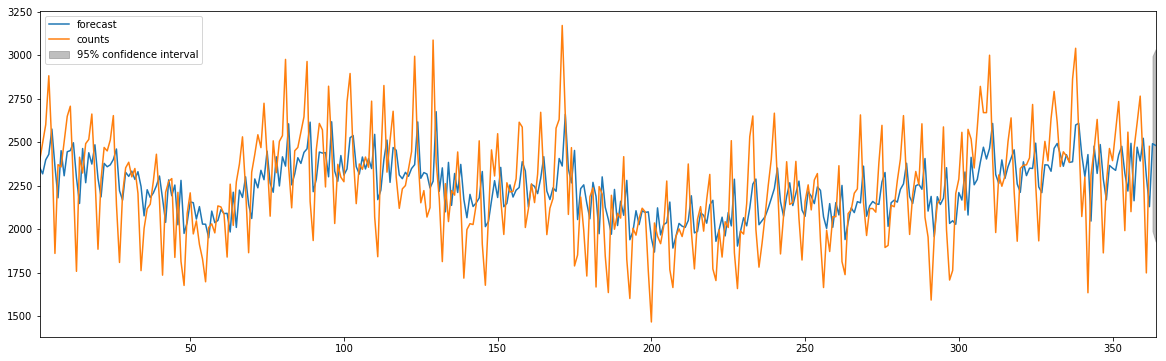

In [69]:
#prediction into future. by taking steps =1 (1 day), and increasing the number of rows by 1 (363-364)
result.plot_predict(1,364)
a=result.forecast(steps=1)

In [70]:
#the value of prediction from the above model.
#result gives the number of passengers who avail cab on next day from taxi stand
result.forecast(steps=1)

(array([2492.69708062]),
 array([256.34125784]),
 array([[1990.27744751, 2995.11671374]]))

#Predict the next point on the path